In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC


In [25]:
df = pd.read_csv("emaildataset.csv")
df.head(10)

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [27]:
print(df.shape)

(2893, 3)


In [28]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [29]:
print("Count of label:\n",df['label'].value_counts())

Count of label:
 0    2412
1     481
Name: label, dtype: int64


 ***Here we can see that we have 2412 non-spam mails and 481 spam mails in the dataset***

In [30]:
#Creating new column for length of message
df['length'] = df.message.str.len()
df.head(10)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0,2201
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0,802
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0,1230
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0,1478


In [31]:
df['length'] = df.message.str.len()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [10]:
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

C:\Users\DEVAL\AppData\Local\Temp/ipykernel_17292/3854355229.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
C:\Users\DEVAL\AppData\Local\Temp/ipykernel_17292/3854355229.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
C:\Users\DEVAL\AppData\Local\Temp/ipykernel_17292/3854355229.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
C:\Users\DEVAL\AppData\Local\Temp/ipykernel_17292/3854355229.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phon

In [32]:

df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')


df['message'] = df['message'].str.replace(r'\s+', ' ')


df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

C:\Users\DEVAL\AppData\Local\Temp/ipykernel_17292/1502770355.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
C:\Users\DEVAL\AppData\Local\Temp/ipykernel_17292/1502770355.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'\s+', ' ')
C:\Users\DEVAL\AppData\Local\Temp/ipykernel_17292/1502770355.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')


In [33]:
df.head(10)

,subject,message,label,length
0,job posting - apple-iss research center,content length 3386 apple iss research center ...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content length 4437 call for papers is the bes...,0,4492
6,m . a . in scandinavian linguistics,m a in scandinavian linguistics at the univers...,0,2201
7,call for papers : linguistics session of the m...,call for papers linguistics session midwest mo...,0,802
8,foreign language in commercials,content length 1937 greetings i m wondering if...,0,1230
9,fulbright announcement : please post / dissemi...,fulbright announcement please post disseminate...,0,1478


In [34]:

import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [35]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length 3386 apple iss research center ...,0,2856,2134
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1374
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1024
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [36]:
print("Original Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Original Length: 9344743
Cleaned Length: 6487583
Total Words Removed: 2857160


C:\Users\DEVAL\anaconda3\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


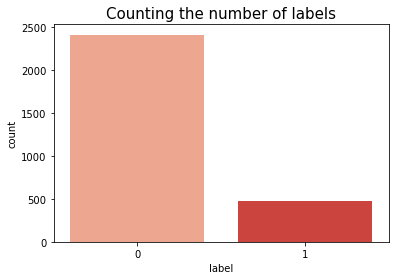

0    2412
1     481
Name: label, dtype: int64


In [37]:
plt.figure(figsize=(6,4))
sns.countplot(df['label'],palette= 'Reds')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

print(df.label.value_counts())

In [38]:
tf_vec = TfidfVectorizer()

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

features = tf_vec.fit_transform(df['message'])

X = features
y = df['label']

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20)
SVM.fit(x_train,y_train)
y_pred = SVM.predict(x_test)
print ('Accuracy of SVM: ', accuracy_score(y_test,y_pred))

Accuracy of SVM:  0.9965457685664939


In [40]:
mnb = MultinomialNB(alpha=1.9)        
mnb.fit(x_train,y_train)
y_pred1 = mnb.predict(x_test)
print("Accuracy Score for Naive Bayes : ", accuracy_score(y_pred1,y_test))

Accuracy Score for Naive Bayes :  0.8583765112262521


In [41]:
rfc = RandomForestClassifier(n_estimators=10,criterion='gini')
rfc.fit(x_train,y_train)
y_pred3 = rfc.predict(x_test)
print("Accuracy Score of Random Forest Classifier : ", accuracy_score(y_pred3,y_test))

Accuracy Score of Random Forest Classifier :  0.9758203799654577


In [42]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[493,   0],
       [  2,  84]], dtype=int64)

### ***Thus  the accuracies of all the classifiers:***

 - Naive Bayes:85.83%
 - SVM : 99.65%
 - Random Forest : 97.58%

### ***Hence, we can see that SVM classifier works the best in the given classifiers with accuracy of approximately 99%